In [1]:
import os, sys
import pandas as pd
import numpy as np

In [2]:
files = os.listdir(r".\dataset\T-news\T-newsgroups")

In [3]:
def listToString(list):
    str1 = " "
    return (str1.join(list))


In [4]:
path = r".\dataset\T-news\T-newsgroups"
dataset = []
data = []

In [5]:
for file in files:
    with open(path+"/" +file, mode ="r") as f:
        data.append(listToString(f.readlines()))

In [249]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords as sw


class LemmaTokenizer(object):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
    def __call__(self, document):
        lemmas = []
        for t in word_tokenize(document):
            t = t.strip()
            lemma = self.lemmatizer.lemmatize(t)
            lemmas.append(lemma)
        
        return lemmas


lemmaTokenizer = LemmaTokenizer()
vectorizer = TfidfVectorizer(tokenizer=lemmaTokenizer, stop_words=sw.words('english'), use_idf= True)

tfidf_X = vectorizer.fit_transform(data)

c:\users\matti\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'doe', 'ha', 'might', 'must', "n't", 'need', 'sha', 'wa', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [7]:
tfidf_X.shape

(4000, 56016)

In [250]:
from sklearn.decomposition import TruncatedSVD
# X: np.array, shape (1000, 20)
svd = TruncatedSVD(n_components=50, random_state=42)
red_X = svd.fit_transform(tfidf_X) # red_X will be: np.array, shape (1000, 5)

In [201]:
red_X.shape

(4000, 50)

In [144]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d


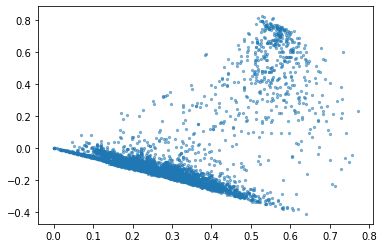

In [145]:
fig = plt.figure()
#ax = plt.axes(projection ="3d")
#ax.scatter(red_X[:,0], red_X[:,1], red_X[:,2], s = 5, alpha = 0.5)

plt.scatter(red_X[:,0], red_X[:,1], s = 5, alpha = 0.5)

In [146]:
from sklearn.cluster import dbscan

In [147]:
labels = dbscan(red_X, eps = 0.001, min_samples= 10 )

In [239]:
#epsilon = np.linspace(0.01, 0.3, 200)
#noise = []
#for eps_value in epsilon:
#    labels = dbscan(red_X, eps = eps_value, min_samples= 10)
#    noise.append(sum(labels[1]== -1))

In [ ]:
plt.plot(epsilon, noise)
plt.title("Relation eps-noise points")
plt.xlabel("Epsilon (Radius)")
plt.ylabel("Number of noise points")
plt.show()

In [266]:
from sklearn.metrics import silhouette_score

svd = TruncatedSVD(n_components=10, random_state=42)
svd.fit(tfidf_X)
red_X = svd.transform(tfidf_X) # red_X will be: np.array, shape (1000, 5)
labels = dbscan(red_X, eps = 0.15, min_samples= 50)
sil = silhouette_score(red_X, labels[1])
sil

0.3268938477641268

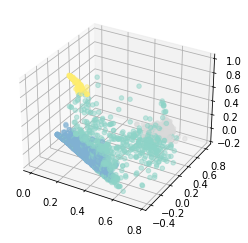

In [237]:
fig = plt.figure()
ax = plt.axes(projection ="3d")
ax.scatter(red_X[:,0], red_X[:,1],red_X[:,2], alpha = 0.5, cmap= "Set3", c = labels[1])


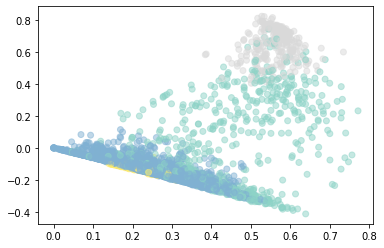

In [238]:
plt.scatter(red_X[:,0], red_X[:,1], alpha = 0.5, cmap= "Set3", c = labels[1])

In [252]:


tfidf_X.shape

(4000, 56016)

In [251]:
print(tfidf_X)

  (0, 8)	0.03799575299831404
  (0, 12055)	0.03851959922464954
  (0, 50963)	0.02712017329190914
  (0, 27549)	0.030419519357360206
  (0, 17637)	0.10245318596419226
  (0, 11410)	0.013604217326994515
  (0, 17684)	0.05807434664837631
  (0, 39773)	0.0756367774392764
  (0, 18192)	0.07236780512161282
  (0, 19420)	0.061358435167268716
  (0, 40965)	0.07389050063165212
  (0, 40486)	0.07628080265816992
  (0, 13591)	0.13237631829091337
  (0, 35854)	0.09153872938031414
  (0, 31453)	0.061170847590076266
  (0, 46496)	0.07236780512161282
  (0, 18407)	0.1952469239720086
  (0, 11104)	0.013704155822717194
  (0, 34127)	0.17188050122909174
  (0, 21454)	0.2049063719283845
  (0, 50406)	0.18307745876062828
  (0, 26128)	0.047538992672395274
  (0, 51683)	0.04069662199945547
  (0, 12611)	0.07145107867998196
  (0, 48154)	0.09419671828936906
  :	:
  (3999, 34148)	0.12014467082386196
  (3999, 35124)	0.05194525843067295
  (3999, 14243)	0.062070112026723794
  (3999, 55300)	0.045856485107887146
  (3999, 45095)	0.081665

AttributeError: idf_ not found

In [258]:
len(vectorizer.get_feature_names())

56016

In [269]:
svd.components_

array([[ 5.95779761e-05,  7.88269782e-05,  6.58752679e-02, ...,
         2.41654466e-04,  5.30106749e-04,  1.02980571e-04],
       [-6.82603831e-05, -7.92046805e-05, -3.44569793e-02, ...,
        -3.05186096e-05, -3.16810941e-04, -8.40182974e-05],
       [-3.97510192e-05, -5.21829154e-05,  3.54548582e-03, ...,
         6.76486093e-06, -2.69084106e-04, -5.48677569e-05],
       ...,
       [-9.43970281e-05, -3.02107646e-05, -2.73366076e-01, ...,
        -1.87364413e-04, -2.96681007e-03, -8.86806056e-05],
       [ 1.09246798e-03, -5.75611842e-04, -1.34276349e-01, ...,
         2.51102938e-04,  1.16171837e-03,  6.40988505e-04],
       [-3.99608554e-04, -2.52094269e-04, -1.08805119e-01, ...,
         1.62919604e-04, -1.81047557e-04,  6.35018991e-04]])

In [271]:
feature_names = vectorizer.get_feature_names()
best_fearures = [feature_names[i] for i in svd.components_[0].argsort()[::-1]]
best_fearures


['--',
 '>',
 '.',
 ',',
 '*',
 ':',
 '@',
 ')',
 '|',
 '(',
 '<',
 '?',
 "''",
 "n't",
 "'s",
 '``',
 'wa',
 '!',
 'would',
 '-',
 'writes',
 'article',
 'one',
 '...',
 'people',
 'ha',
 'like',
 'gun',
 'think',
 'get',
 'year',
 '$',
 'know',
 'time',
 'doe',
 'right',
 'game',
 'could',
 "'",
 "'m",
 'good',
 'thing',
 ';',
 'make',
 'space',
 'also',
 'say',
 'well',
 'much',
 'way',
 'nntp-posting-host',
 'even',
 'see',
 'go',
 'day',
 'team',
 'first',
 'reference',
 'u',
 'may',
 'many',
 'government',
 ']',
 'believe',
 'use',
 'anyone',
 'want',
 '[',
 'two',
 'last',
 'problem',
 'message-id',
 'never',
 "'re",
 'better',
 'player',
 'come',
 'really',
 'said',
 'might',
 'fire',
 "'ve",
 "'d",
 'still',
 'something',
 'run',
 'world',
 'back',
 'new',
 'point',
 'law',
 'going',
 'lot',
 'fbi',
 'work',
 '..',
 'need',
 'question',
 'take',
 'ca',
 '1',
 'weapon',
 'enough',
 'look',
 'sure',
 'since',
 'baseball',
 'used',
 'system',
 'someone',
 'find',
 'david',
 "'ll"